# Analysis of Change in Crop Yield and Variability

**Goal:** To create maps that visualize how both the average yield and the year-to-year variability of maize have changed between the early and late periods of our dataset (1981-2016).

Maize data loaded.
Saved yield change map to: ../reports/figures/maize_yield_change_map.png


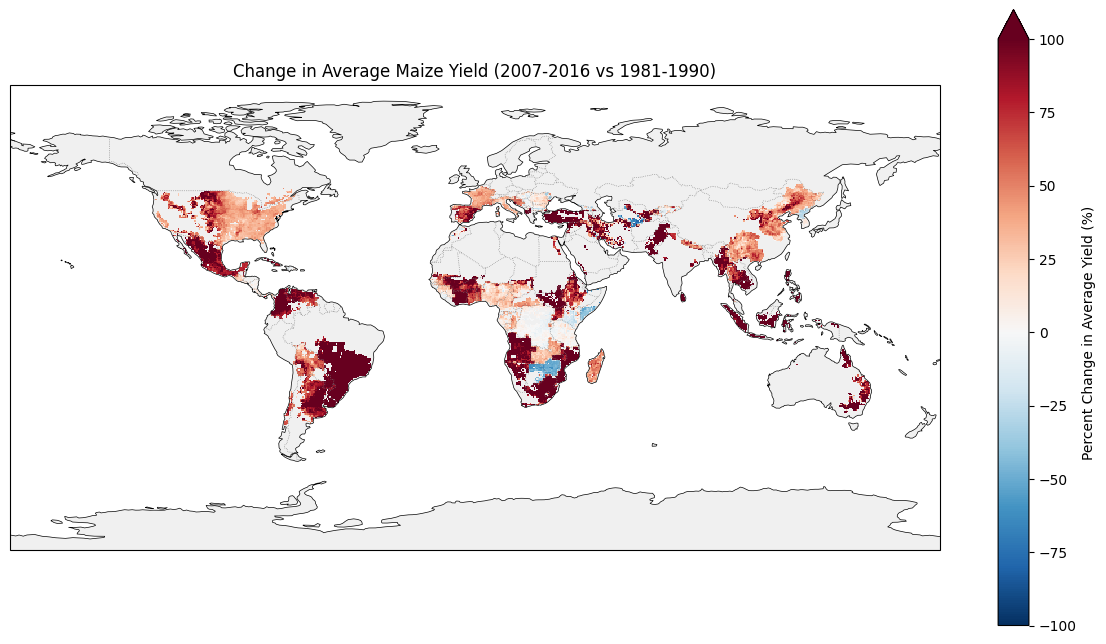

In [1]:
# Cell 1: Map of Change in Average Yield
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os

# --- 1. Load Data ---
# We'll focus on maize for this example
DATA_PATH = '../data/maize/yield_*.nc4'
with xr.open_mfdataset(DATA_PATH, combine='nested', concat_dim='time') as ds:
    years = range(1981, 2017)
    ds = ds.assign_coords(time=years)
    maize_yield = ds['var'].compute() # Load into memory for faster calculations
    print("Maize data loaded.")

# --- 2. Define Time Periods and Calculate Change ---
# Define the first and last 10 years of the dataset
early_period = slice('1981', '1990')
late_period = slice('2007', '2016')

# Calculate the mean yield for each period
yield_early = maize_yield.sel(time=early_period).mean(dim='time')
yield_late = maize_yield.sel(time=late_period).mean(dim='time')

# Calculate the percentage change
# We use xr.where to avoid division by zero in areas with no crops
percent_change = xr.where(
    yield_early > 0,
    100 * (yield_late - yield_early) / yield_early,
    np.nan
)

# --- 3. Plot the Change Map ---
fig, ax = plt.subplots(figsize=(15, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_feature(cfeature.LAND, facecolor='#f0f0f0')
ax.coastlines(linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray', linewidth=0.5)

# Use a diverging colormap: blue for increase, red for decrease, white for no change
# We center the colormap on zero.
cmap = 'RdBu_r'
vmax = 100 # Cap the color scale at 100% change for better visualization

percent_change.plot(
    ax=ax,
    cmap=cmap,
    transform=ccrs.PlateCarree(),
    vmax=vmax,
    center=0, # This is crucial for a diverging colormap
    cbar_kwargs={'label': 'Percent Change in Average Yield (%)'}
)

ax.set_title('Change in Average Maize Yield (2007-2016 vs 1981-1990)')

# --- 4. Save the Figure ---
output_dir = '../reports/figures/'
os.makedirs(output_dir, exist_ok=True)
file_path = os.path.join(output_dir, 'maize_yield_change_map.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
print(f"Saved yield change map to: {file_path}")

plt.show()

## Change in Yield Variability (Stability)

Now we'll investigate if yields have become more or less stable over time. We'll calculate the standard deviation of yield for the first and second halves of the dataset and map the percentage change between them.

C:\ProgramData\miniconda3\envs\climarisc\lib\site-packages\numpy\lib\_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\ProgramData\miniconda3\envs\climarisc\lib\site-packages\numpy\lib\_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Saved variability change map to: ../reports/figures/maize_variability_change_map.png


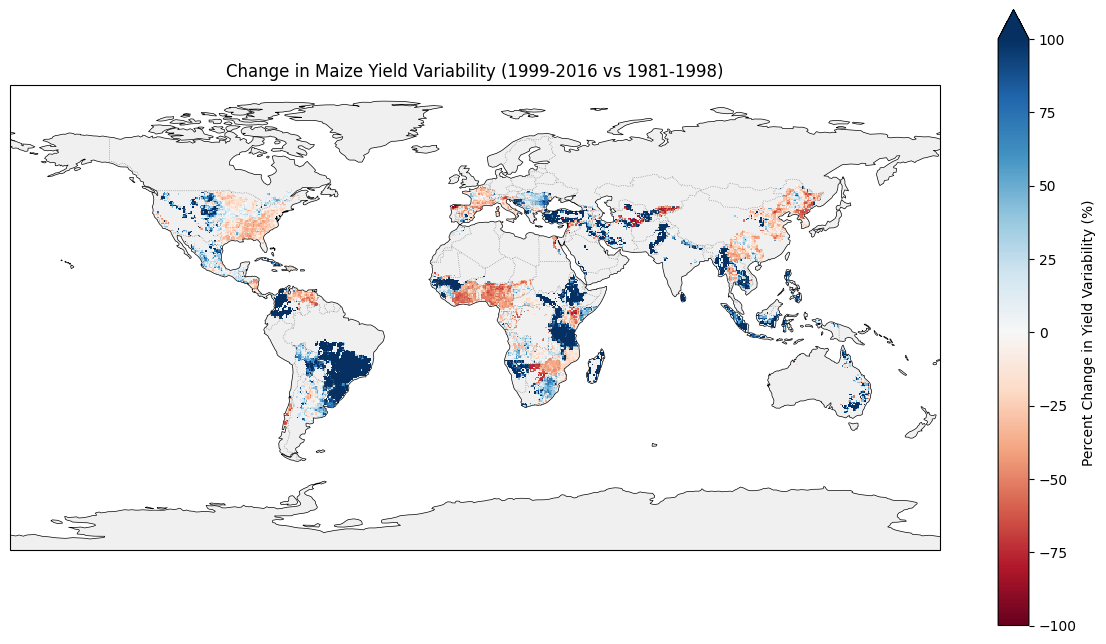

In [2]:
# Cell 2: Map of Change in Yield Variability

# --- 1. Define Time Periods and Calculate Variability ---
# Split the dataset into two halves
first_half = slice('1981', '1998')
second_half = slice('1999', '2016')

# Calculate the standard deviation (a measure of variability) for each half
variability_first = maize_yield.sel(time=first_half).std(dim='time')
variability_second = maize_yield.sel(time=second_half).std(dim='time')

# Calculate the percentage change in variability
percent_change_variability = xr.where(
    variability_first > 0.1, # Use a small threshold to avoid extreme values
    100 * (variability_second - variability_first) / variability_first,
    np.nan
)

# --- 2. Plot the Variability Change Map ---
fig, ax = plt.subplots(figsize=(15, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_feature(cfeature.LAND, facecolor='#f0f0f0')
ax.coastlines(linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray', linewidth=0.5)

# Use a diverging colormap. Here, red means MORE variable (less stable), blue means LESS variable (more stable).
cmap = 'RdBu' # Note: not '_r'. Red should be positive change (more variability).
vmax = 100 # Cap at 100% change

percent_change_variability.plot(
    ax=ax,
    cmap=cmap,
    transform=ccrs.PlateCarree(),
    vmax=vmax,
    center=0,
    cbar_kwargs={'label': 'Percent Change in Yield Variability (%)'}
)

ax.set_title('Change in Maize Yield Variability (1999-2016 vs 1981-1998)')

# --- 3. Save the Figure ---
output_dir = '../reports/figures/'
file_path = os.path.join(output_dir, 'maize_variability_change_map.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
print(f"Saved variability change map to: {file_path}")

plt.show()